# Becoming an Independent Data Scientist

# Assignment (week-4)

This assignment requires that you identify at least two publicly accessible datasets from the same region that are consistent across a meaningful dimension. You will state a research question that can be answered using these data sets and then create a visual using matplotlib that addresses your stated research question. You will then be asked to justify how your visual addresses your research question.

As this assignment is for the whole course, you must incorporate and defend the principles discussed in the first week and align with Cairo’s principles of truth, beauty, function, and insight.

1. Region and Domain
The United Kingdom
Weather and mortal cases.
2. Research Question.
Everyone knows about terrible England weather, but not all realize how it really affects our lives. I tried to figure out how deaths in UK depend on weather conditions. For the analysis I choose two the main weather characteristics - rainfall and temperature and compare it with death cases for the same periods.
Evaluating period 2010-2018 
3. Links:

Average rainfall (mm) and average temperature (centigrade) for the North East England and East England Met Office Climate district, which encompasses Lincolnshire. This dataset shows the average rainfall in millimetres and average temperature in centigrade by month, year, and meteorological season. It also has an annual figure for each year.
https://www.europeandataportal.eu/data/datasets/average-rainfall-temperature?locale=en

Deaths registered monthly in England and Wales. Number of deaths registered each month by area of usual residence for England and Wales, by region, county, local and unitary authority, and London borough.
https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/monthlyfiguresondeathsregisteredbyareaofusualresidence

4. Code & Results:

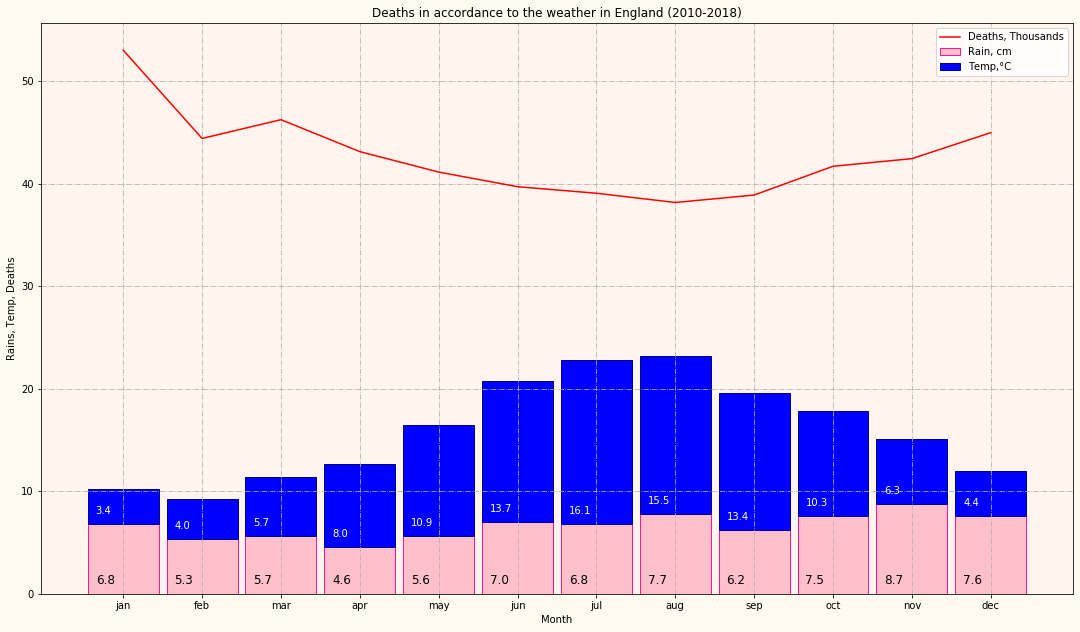

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

dfm = pd.read_csv('mort.csv').set_index('Year')
dfrt = pd.read_csv('rt.csv', usecols=['Year', 'Period', 'Rainfallmm', 'Temp'])
dfm.columns = dfm.columns.astype(str).str.lower()
dfrt = dfrt[(dfrt.Period != 'Winter') &
            (dfrt.Period != 'Spring') &
            (dfrt.Period != 'Summer') &
            (dfrt.Period != 'Autumn') &
            (dfrt.Period != 'Annual')]
dfrt.Period = dfrt.Period.str.lower()

months = ["jan", "feb", "mar", "apr", "may", "jun",
          "jul", "aug", "sep", "oct", "nov", "dec"]
df = pd.DataFrame(index=months)
df['rain'] = dfrt.groupby('Period')['Rainfallmm'].mean()
df['temp'] = dfrt.groupby('Period')['Temp'].mean()

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.bar(df.rain.index, df.rain.values/10,
          color='pink',
          edgecolor='deeppink',
          width=.9,
          label = 'Rain, cm')

ax.bar(df.temp.index, df.temp.values,
          color='blue',
          edgecolor='darkblue',
          width=.9,
          bottom = df.rain.values/10,
          label = 'Temp,°C')

ax.plot(dfm.mean()/1000, 'r-',  label='Deaths, Thousands')

for i in range(12):
    ax.text(i-.35, df.rain.values[i]/10+1, str(round(df.temp.values[i], 1)), fontsize=10, color='w')
    ax.text(i-.35, 1, str(round(df.rain.values[i] / 10, 1)), fontsize=12)

fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')
ax.set_title('Deaths in accordance to the weather in England (2010-2018)')
ax.axes.set_xlabel('Month')
ax.axes.set_ylabel('Rains, Temp, Deaths')
ax.grid(linestyle='dashdot')
ax.legend()

plt.savefig('res.png')
plt.show()

5.	Discussion

Short descriptions.
On the visualization it’s shown weather criteria rainfall and weather at bottom histograms and mortal cases at the top line-graph. This is average date for each month during the period 2010-2018.
Conclusion.
The graph shows, that we have very clear dependence of deaths against the low temperature and  - it was surprise for me – rainfalls too. In Jan. and Dec. with the lowest Temp. the mortal cases increase as it decrease at summer time when the weather Temp. goes to the year top.
But compering Nov. and Dec. rains with Jan. and Feb. we can say the worst thing which kill the people its low temperature – we have more deaths when the weather goes down with more or less the same quantities of rains.
1. I discovered that the rain information from this data, that rain happens throughout the year in England. 
2. The chart shows the strong correlation of death rate and temperature as explained. 
3. Using the same Y scale for each quality work in this case and correlation is easily seen from the graph.


And a few words about the Graph itself:
1. Truthfulness – real information avoiding misleading.
2. Beauty – looks really nice, a love it.
3. Functionality – everything is simple and clear
4. Insightfulness – the graph is not overloaded with information, very simple to read
